In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv("emp_automovel.csv")

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54025 entries, 0 to 54024
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   receita_cliente      54025 non-null  float64
 1   anuidade_emprestimo  54025 non-null  float64
 2   anos_casa_propria    54025 non-null  float64
 3   telefone_trab        54025 non-null  int64  
 4   avaliacao_cidade     54025 non-null  float64
 5   score_1              54025 non-null  float64
 6   score_2              54025 non-null  float64
 7   score_3              54025 non-null  float64
 8   score_social         54025 non-null  float64
 9   troca_telefone       54025 non-null  float64
 10  inadimplente         54025 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 4.5 MB


In [4]:
x = dados.drop(columns=['inadimplente'])
y = dados['inadimplente']

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
modelo = DecisionTreeClassifier()
modelo.fit(x, y)

DecisionTreeClassifier()

In [7]:
print(f'Acurácia: {modelo.score(x, y)}')

Acurácia: 1.0


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_1, x_teste, y_1, y_teste = train_test_split(x, y, test_size = 0.15, stratify = y, random_state = 5)

In [10]:
x_treino, x_val, y_treino, y_val = train_test_split(x_1, y_1, stratify = y_1, random_state = 5)

In [11]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_treino, y_treino)
print(f'Acurácia: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia: {modelo.score(x_val, y_val)}')

Acurácia: 0.9206445993031359
Acurácia: 0.9059315390645414


In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[10355   124]
 [  956    46]]


In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

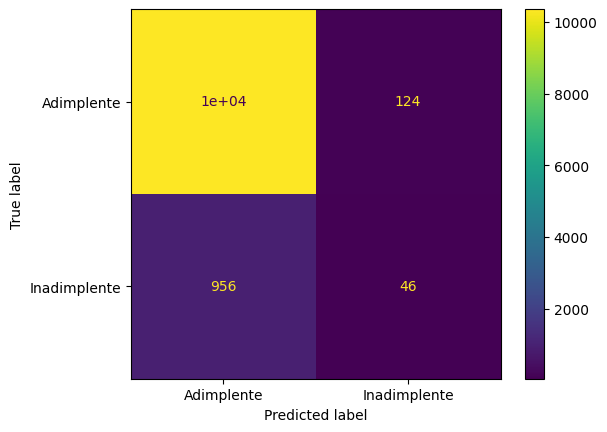

In [15]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Adimplente', 'Inadimplente'])
visualizacao.plot();

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [17]:
print(f'Acurácia: {accuracy_score(y_val, y_previsto)}')

Acurácia: 0.9059315390645414


In [18]:
print(f'Precisão: {precision_score(y_val, y_previsto)}')

Precisão: 0.27058823529411763


In [19]:
print(f'Recall: {recall_score(y_val, y_previsto)}')

Recall: 0.04590818363273453


In [20]:
print(f'F1-score: {f1_score(y_val, y_previsto)}')

F1-score: 0.07849829351535836


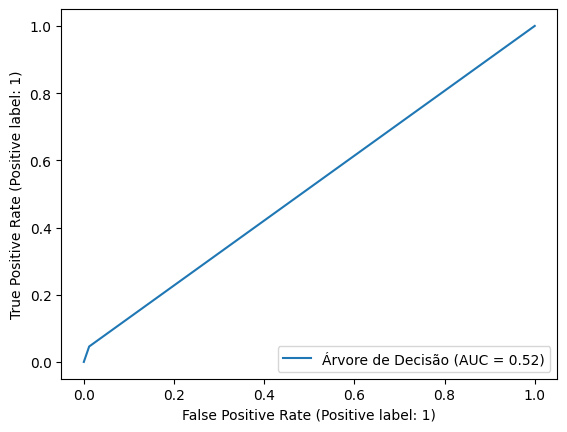

In [21]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_val, y_previsto, name="Árvore de Decisão")

In [22]:
print(f'AUC: {roc_auc_score(y_val, y_previsto)}')

AUC: 0.5170374967214155
